# Data Exploration

### Importing the data

In [1]:
import pandas as pd

# Read the data from the file
data_garmin_df = pd.read_csv('data/Garmin_Connect.csv')
data_samsung_df = pd.read_csv('data/Samsung_Health.csv')
data_huawei_df = pd.read_csv('data/Huawei_Health.csv')

data = pd.concat([data_garmin_df, data_samsung_df, data_huawei_df], ignore_index=True)

print(data.head())

                                                data  score  rating  \
0  Contrairement aux idées reçues le traceur GPS ...      5       1   
1               Application très pratique et fiable.      5       1   
2                                   jadore ma montre      5       1   
3  Super application, je l'utilise synchronisé av...      5       1   
4                                            Super !      5       1   

   bug_report  feature_request  user_experience  
0           0                0                1  
1           0                0                0  
2           0                0                0  
3           0                0                1  
4           0                0                0  


### Amount of examples per class

Number of examples:  6000
Rating:  3652
User Experience:  1131
Bug Report:  2067
Feature Request:  1040


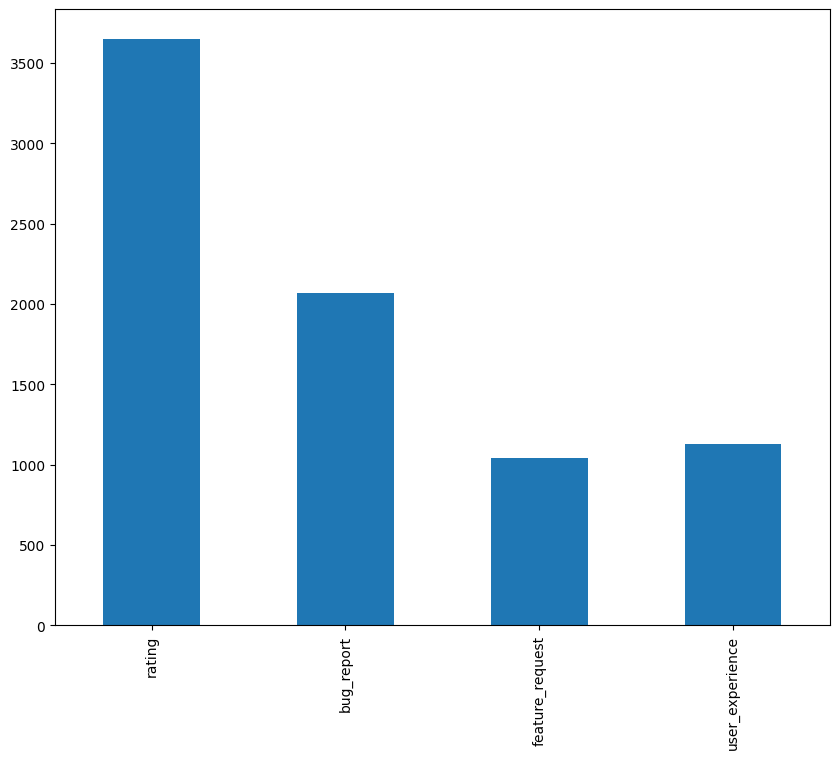

In [7]:
import matplotlib.pyplot as plt

# print amount of examples per class in the dataset
print("Number of examples: ", len(data))
print("Rating: ", len(data[data['rating'] == 1]))
print("User Experience: ", len(data[data['user_experience'] == 1]))
print("Bug Report: ", len(data[data['bug_report'] == 1]))
print("Feature Request: ", len(data[data['feature_request'] == 1]))

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

data_labels = data[["rating", "bug_report", "feature_request", "user_experience"]]

data_labels.sum(axis=0).plot.bar()

# combine all text columns into one list
raw_text = " ".join(data['data'].tolist())

#print(raw_text)

## Word distribution (TF-IDF)


In [3]:
# tokenize the text
from nltk.tokenize import word_tokenize

def flatten(l):
    return [item for sublist in l for item in sublist]

tokenized_text = flatten(data['data'].apply(word_tokenize).tolist())

print(tokenized_text)

['Contrairement', 'aux', 'idées', 'reçues', 'le', 'traceur', 'GPS', 'est', 'très', 'précis', ',', 'dumoins', 'avec', 'vivoactive', '3', 'Music', '..', 'Très', 'motivant', 'pour', 'la', 'suite', '.', 'Je', 'conseil', 'garmin', 'Application', 'très', 'pratique', 'et', 'fiable', '.', 'jadore', 'ma', 'montre', 'Super', 'application', ',', 'je', "l'utilise", 'synchronisé', 'avec', 'ma', 'fenix3', 'et', "j'adore", 'Super', '!', 'Application', 'très', 'pratique', 'et', 'très', 'simple', "d'utilisation", '.', 'Une', 'fois', 'la', 'montre', 'couplée', 'pour', 'la', 'première', 'fois', ',', 'tout', 'se', 'fait', 'automatiquement', '.', 'Néanmoins', ',', 'depuis', 'quelques', 'temps', ',', 'les', 'données', "d'altitude", 'sont', 'totalement', 'faussées', '!', 'Suivis', 'du', 'sommeil', 'cardio', 'nombre', 'de', 'pas', 'avec', 'la', 'distance', 'dans', 'la', 'journée', '.impeccable', 'Sympa', 'et', 'précis', '!', 'Très', 'satisfait', 'bonjour', ',', 'le', 'calendrier', 'ne', 'se', 'synchronise', '

In [4]:
from collections import Counter

unique_tokens = set(tokenized_text)

count_dict = {}
for type in unique_tokens:
    count_dict[type] = raw_text.count(type)

token_counter = Counter(count_dict)
print(token_counter.most_common(100))

[('e', 69864), ('i', 38827), ('a', 38703), ('s', 37937), ('n', 37682), ('t', 34777), ('o', 32612), ('r', 32493), ('u', 27305), ('l', 26281), ('p', 22958), ('c', 18941), ('m', 17826), ('d', 14273), ('on', 12962), ('.', 8719), ('es', 8275), ('é', 8203), ('le', 7552), ('re', 7167), ('en', 7032), ('de', 6935), ('ou', 6593), ('is', 6383), ('er', 6206), ('ne', 6003), ("'", 5874), ('f', 5351), ('ai', 5100), ('te', 4908), ('me', 4648), ('q', 4395), ('qu', 4349), ('at', 4287), ('tion', 4161), ('h', 4141), ('g', 4097), ('se', 4008), ('et', 3975), ('co', 3962), ('j', 3913), ('an', 3890), ('ma', 3621), ('la', 3488), ('our', 3364), ('ca', 3252), ('it', 3185), (',', 3032), ('in', 3000), ('app', 2883), ('que', 2755), ('mo', 2728), ('ce', 2710), ('il', 2670), ('us', 2640), ('as', 2598), ('su', 2448), ('un', 2427), ('appl', 2414), ('appli', 2407), ('à', 2327), ('si', 2288), ('or', 2284), ('ch', 2195), ('pas', 2061), ('plication', 1970), ('au', 1964), ('eu', 1904), ('mon', 1893), ('lu', 1852), ('el', 18

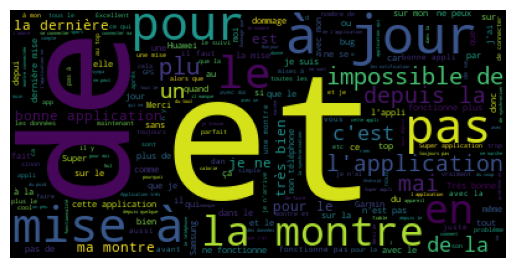

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate(" ".join(tokenized_text))

plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

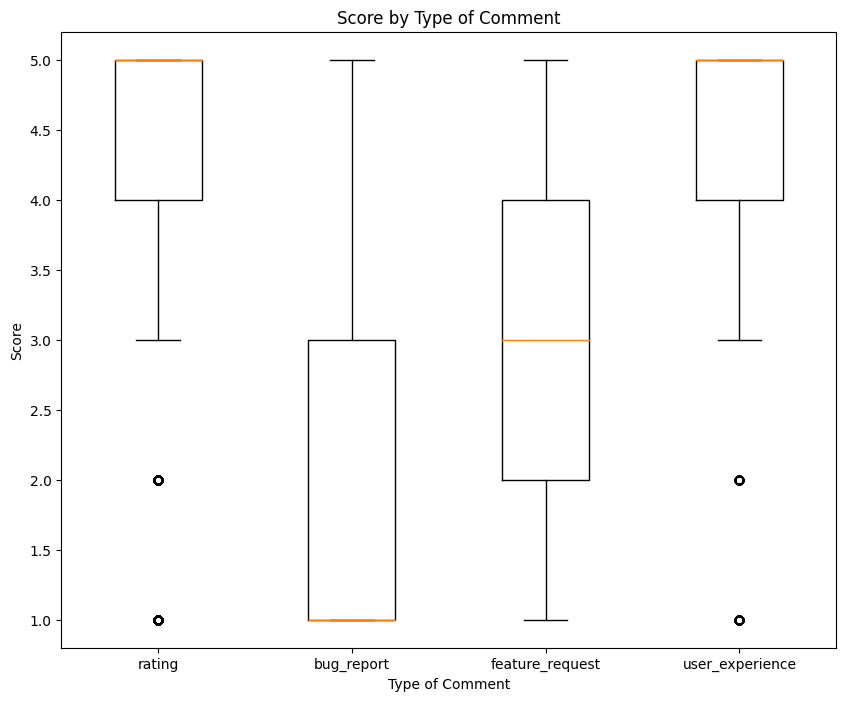

In [8]:
score_columns = ['rating', 'bug_report', 'feature_request', 'user_experience']

# Create a box plot to show the distribution of scores for each type of comment
fig, ax = plt.subplots(figsize=(10, 8))
ax.boxplot([data[data[col]==1]['score'] for col in score_columns], labels=score_columns)
ax.set_xlabel('Type of Comment')
ax.set_ylabel('Score')
ax.set_title('Score by Type of Comment')

# Show the plot
plt.show()